In [1]:
import random 

import numpy as np
import matplotlib.pyplot as plt

from Petri.initialize_world import create_wind
from Petri.utils import _return_neighboring_unoccupied_locs, _move, _return_neighboring_occupied_locs
from Petri.elements import Dreg, Res, Sorter, Emitter, Data
from Petri.Simulator import simulator

%matplotlib inline

In [2]:
def Force(curr_loc, env):
    free_locs = _return_neighboring_unoccupied_locs(curr_loc, env)
    if free_locs:
        loc = random.choice(free_locs)
        env[loc] = (8, None)
    
def Wind(curr_loc, env):
    
    # step 1 - if theres a kite, push it
    neighbors = _return_neighboring_occupied_locs(curr_loc, env)
    
    if neighbors:
        left_neighbors = [l for l in neighbors if l[1] < curr_loc[1]]
        if left_neighbors:
            for neighbor in left_neighbors:
                if env[neighbor][0] == 1:
                    kite_new_loc = (neighbor[0], neighbor[1] - 2)
                    element = (1, None)
                    _move(neighbor, kite_new_loc, element, env)
                    env.pop(curr_loc)  # wind disappears after pushing
                elif env[neighbor][0] == 8:
                    env.pop(curr_loc)
            
        # if theres no kite, move itself
        else:
            free_locs = _return_neighboring_unoccupied_locs(curr_loc, env)
            if free_locs:
                left_locs = [l for l in free_locs if l[1] < curr_loc[1]]
                if left_locs:
                    next_loc = random.choice(left_locs)
                    element = (8, None)
                    _move(curr_loc, next_loc, element, env)
                    
    # no neighbors
    else:
        free_locs = _return_neighboring_unoccupied_locs(curr_loc, env)
        left_locs = [l for l in free_locs if l[1] < curr_loc[1]]
        if left_locs:
            next_loc = random.choice(left_locs)
            element = (8, None)
            _move(curr_loc, next_loc, element, env)
        else:
            env.pop(curr_loc)
                    
        
def Kite(curr_loc, env):
    pass

In [3]:
loop = {7: Force, 8: Wind, 1: Kite}

n_rows = 20
n_cols = 60
epochs = 200000
ENV = create_wind(n_rows=n_rows, n_cols=n_cols, n_force=10, n_kites=7)
CANVASS = np.zeros((n_rows, n_cols))

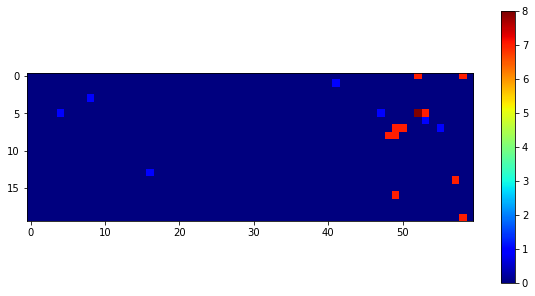

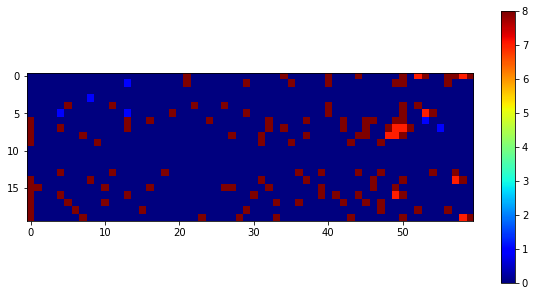

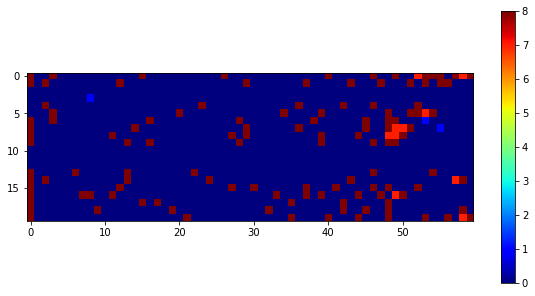

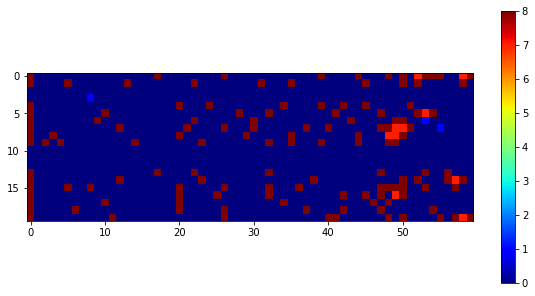

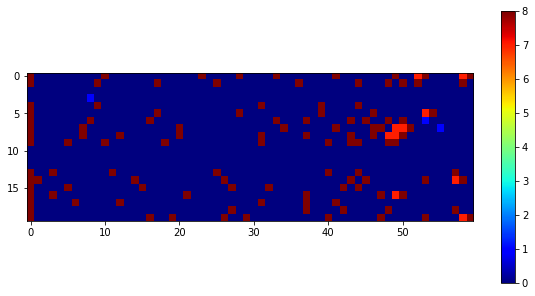

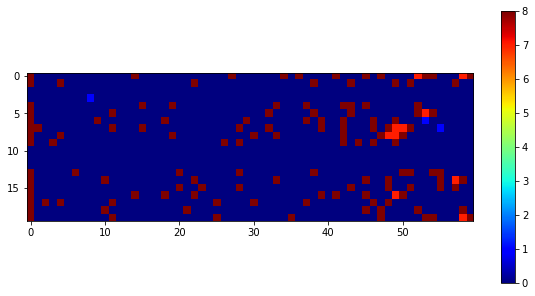

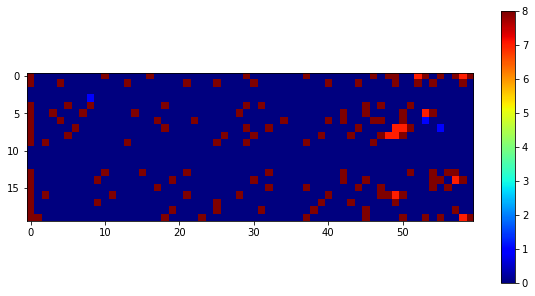

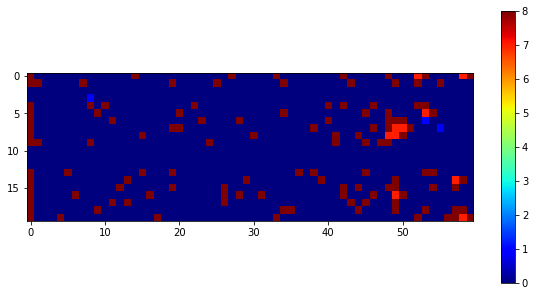

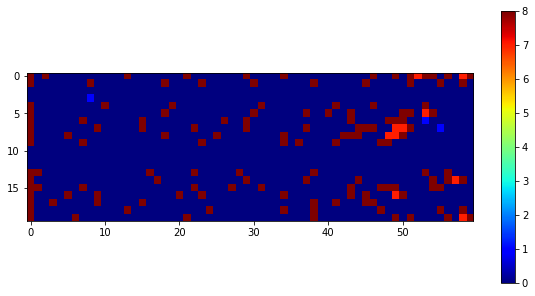

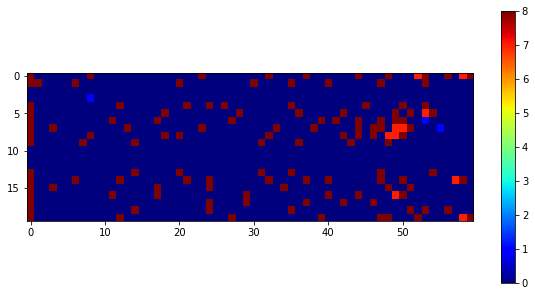

In [4]:
simulator(ENV, CANVASS, epochs, loop, frames=10, save=False)